In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [11]:
import random
import math

nmax = 100
random.seed(1)

pos = 0
jumpsum = 0
total_jumps = 0

n_trys = 1000

x = []
y = []
eval = []  # this will be used for intermediate steps in the recursion method
evalr = []  # this will be for the recursion method - it is just eval[] shifted by one,
sigma = []


def inverse_distance_jump(end):
    # Calculate the probability of each jump distance being inversely proportional to the distance
    probabilities = [1.0 / i for i in range(1, end + 1)]
    
    # Normalize probabilities
    total_prob = sum(probabilities)
    normalized_probs = [prob / total_prob for prob in probabilities]

    # Use the probabilities to determine the jump distance
    return random.choices(range(1, end + 1), weights=normalized_probs)[0]


# %%
for npad in range(1, nmax + 1):

    if npad == 1:
        eval.append(1)
        evalr.append(1)
    else:
        _sum = 0.0
        for i in range(1, npad):
            _sum += 1.0 / npad * (1.0 + eval[npad - i - 1])
        _sum += 1.0 / npad
        eval.append(_sum)
        evalr.append(eval[npad - 1])
    print("Theory: ", npad, eval[npad - 1], evalr[npad - 1])

    x.append(npad)

    end = npad

    # simulate the process of getting across the stream n_trys times
    for j in range(n_trys):

        # main simulation loop
        while pos < npad:
            # pos = int(random.uniform(1, end + 1))
            pos += inverse_distance_jump(end)
            jumpsum += 1

        # reset pos to zero, add to total jumps, reset jumpsum
        pos = 0
        total_jumps += jumpsum
        jumpsum = 0

    # print (npad,total_jumps,n_trys)

    expectation_value = total_jumps / n_trys * 1.0
    y.append(expectation_value)
    sigma.append(expectation_value * 1 / math.sqrt(n_trys))
    total_jumps = 0

    print("Expectation value for n = %d is %f +/- %f" % (npad, expectation_value, expectation_value * 1 / math.sqrt(n_trys)))


Theory:  1 1 1
Expectation value for n = 1 is 1.000000 +/- 0.031623
Theory:  2 1.5 1.5
Expectation value for n = 2 is 1.697000 +/- 0.053664
Theory:  3 1.8333333333333333 1.8333333333333333
Expectation value for n = 3 is 2.103000 +/- 0.066503
Theory:  4 2.083333333333333 2.083333333333333
Expectation value for n = 4 is 2.447000 +/- 0.077381
Theory:  5 2.2833333333333337 2.2833333333333337
Expectation value for n = 5 is 2.734000 +/- 0.086457
Theory:  6 2.4499999999999997 2.4499999999999997
Expectation value for n = 6 is 2.928000 +/- 0.092591
Theory:  7 2.5928571428571425 2.5928571428571425
Expectation value for n = 7 is 3.141000 +/- 0.099327
Theory:  8 2.7178571428571425 2.7178571428571425
Expectation value for n = 8 is 3.223000 +/- 0.101920
Theory:  9 2.8289682539682537 2.8289682539682537
Expectation value for n = 9 is 3.496000 +/- 0.110553
Theory:  10 2.928968253968254 2.928968253968254
Expectation value for n = 10 is 3.509000 +/- 0.110964
Theory:  11 3.0198773448773446 3.0198773448773

[1.24143028 0.73768924]


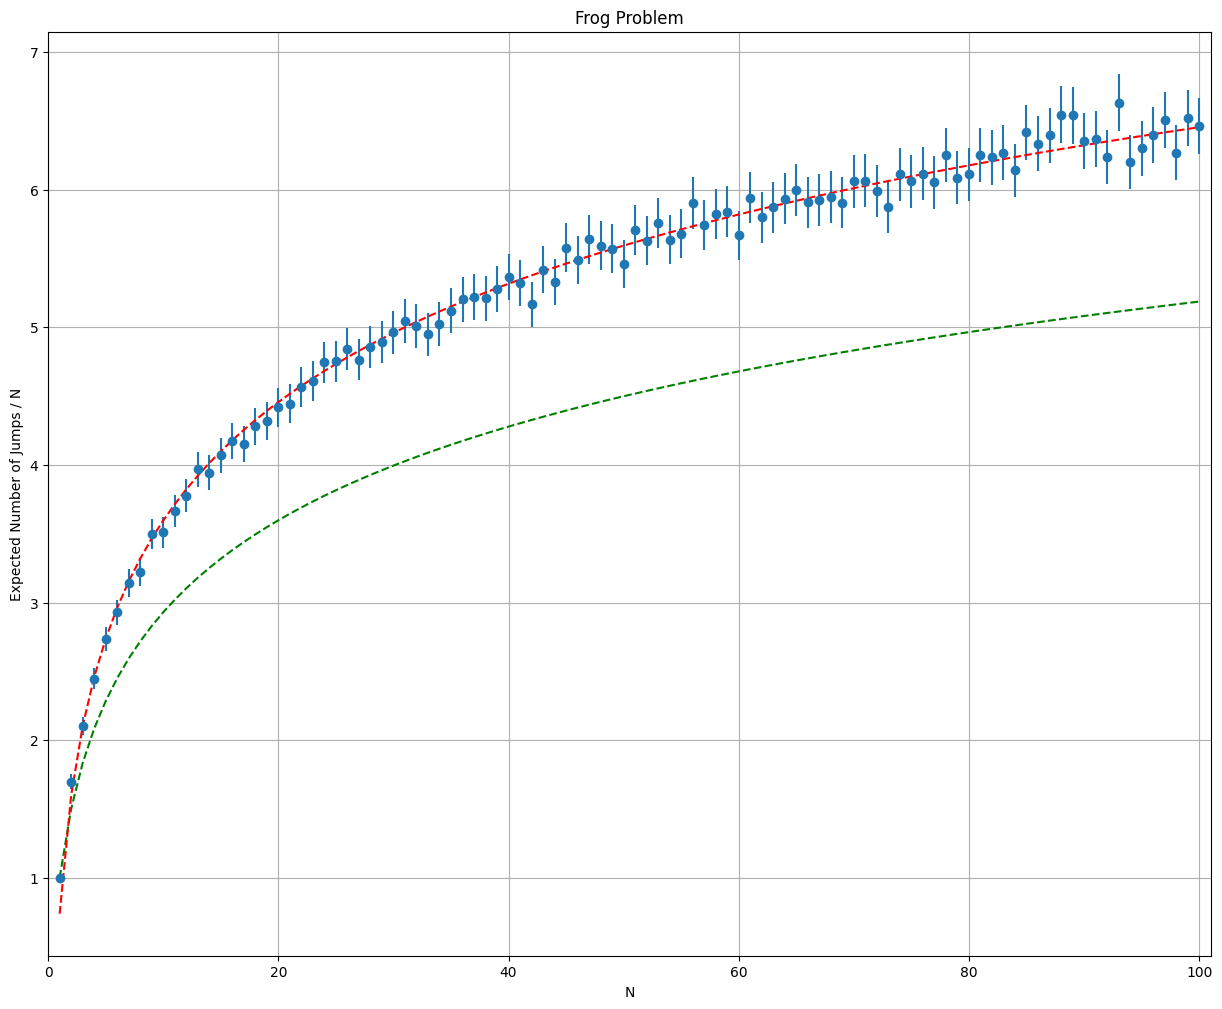

In [12]:
from scipy.optimize import curve_fit

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
#ax1.plot(x,evalr,'r--')
ax1.plot(x,eval,'g--')

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,nmax+1)
ax1.grid(True)

# fit of data
z = np.polyfit(np.log(x), y, 1)
print(z)
polynomial = np.poly1d(z)
zs = polynomial(np.log(x))
ax1.plot(x, zs, 'r--') 

I expected more jumps than the version studied in class due to the jumps being weighted closer to the frog's starting point. The frog is more likely to jump a shorter distance than a longer distance, so it will take more jumps to get across the stream. 

A logarithmic fit was used to fit the data. The fit looks surprisingly nice given the simple fit function as follows:

$y = 1.24143028⋅log(x)+0.73768924$